### Дан объект в 2d пространстве

При помощи линейных отображений:
● Уменьшить объект в два раза
● Повернуть на 130 градусов
● Отразить объект относительно прямой y=x
● Вычислить определитель композиции преобразований (итоговой матрицы реализующей все три отображения)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Иинициализация...
A = [[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]]
A

[[-100, -100, 1],
 [-100, 100, 1],
 [100, 100, 1],
 [0, 0, 1],
 [100, -100, 1],
 [-100, -100, 1]]

In [33]:
A = np.array(A)
x = A[:,0]
y = A[:,1]
print(x, y)

[-100 -100  100    0  100 -100] [-100  100  100    0 -100 -100]


(-200.0, 200.0)

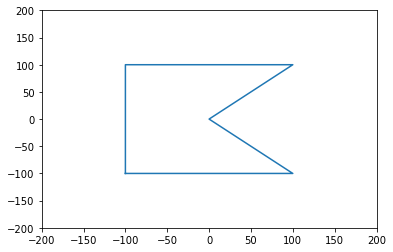

In [4]:
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [94]:
# 1. Уменьшить объект в 2 раза:
# Создаю диагональную матрицу со значением 0,5 по диагонали

D1 = np.array([[0.5, 0, 0, 0, 0, 0],
               [0, 0.5, 0, 0, 0, 0],
               [0, 0, 0.5, 0, 0, 0],
               [0, 0, 0, 0.5, 0, 0],
               [0, 0, 0, 0, 0.5, 0],
               [0, 0, 0, 0, 0, 0.5]
              ])
D1

array([[0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5]])

In [95]:
# Перемножаю диагональную матрицу на вектора
x1=D1@x
y1=D1@y

(-200.0, 200.0)

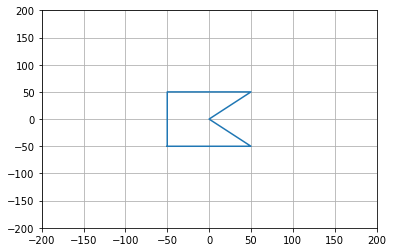

In [96]:
# Визуализирую
plt.plot(x1, y1)
plt.grid()
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [188]:
# 2а. Сперва поверну на 90 градусов по часовой. 90  легче проверить (нагляднее)

#D2 = np.array([[cos(t), sin(t)],
#               [-sin(t), cos(t)]])
# где t=90 градусов в радианах = 1,57

D2 = np.array([[0, 1],
               [-1, 0]])
D2

array([[ 0,  1],
       [-1,  0]])

In [189]:
x2=[]
y2=[]
for i in range(len(x1)):
    # print(x1[i], y1[i])
    vr=np.array([[x1[i]], [y1[i]]])
    vr1=D2@vr
    x2.extend(vr1[0])
    y2.extend(vr1[1])
print(x2, y2)

[-50.0, 50.0, 50.0, 0.0, -50.0, -50.0] [50.0, 50.0, -50.0, 0.0, -50.0, 50.0]


(-200.0, 200.0)

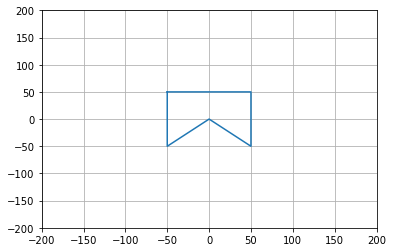

In [190]:
# Визуализирую для 90
plt.plot(x2, y2)
plt.grid()
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
# Вроде все правильно...

In [195]:
# 2б. Теперь поверну на 130 градусов по часовой.

#D3 = np.array([[cos(t), sin(t)],
#               [-sin(t), cos(t)]])
# где t=130 градусов в радианах = 2,27

D3 = np.array([[-0.64, 0.77],
               [-0.77, -0.64]])
D3

array([[-0.64,  0.77],
       [-0.77, -0.64]])

In [196]:
x3=[]
y3=[]
for i in range(len(x1)):
    vr=np.array([[x1[i]], [y1[i]]])
    vr1=D3@vr
    x3.extend(vr1[0])
    y3.extend(vr1[1])
print(x3, y3)

[-6.5, 70.5, 6.5, 0.0, -70.5, -6.5] [70.5, 6.5, -70.5, 0.0, -6.5, 70.5]


(-200.0, 200.0)

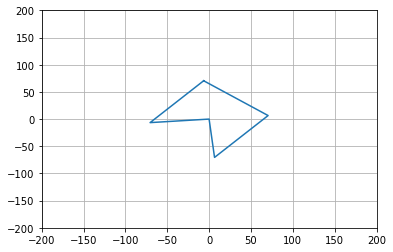

In [197]:
# Визуализирую для 130 градусов
plt.plot(x3, y3)
plt.grid()
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
# Отразить объект относительно прямой y=x



In [200]:
D4 = np.array([[0, 1],
               [1, 0]])
D4

array([[0, 1],
       [1, 0]])

In [203]:
x4=[]
y4=[]
for i in range(len(x3)):
    vr=np.array([[x3[i]], [y3[i]]])
    vr1=D4@vr
    x4.extend(vr1[0])
    y4.extend(vr1[1])
print(x4, y4)

[70.5, 6.5, -70.5, 0.0, -6.5, 70.5] [-6.5, 70.5, 6.5, 0.0, -70.5, -6.5]


(-200.0, 200.0)

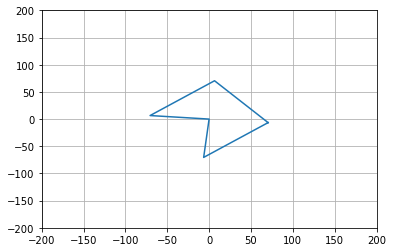

In [204]:
# Визуализирую
plt.plot(x4, y4)
plt.grid()
plt.ylim([-200, 200])
plt.xlim([-200, 200])

### Решите систему уравнений, используя матричный подход

x + z = 2

-x + y - 2*z + w = -2

4*x + z - 2*w = 0

-4*x + 4*y + w = 5

In [16]:
# Выразим систему уравнений через матрицу:

A1 = [[1, 0, 1, 0],
[-1, 1, -2, 1],
[4, 0, 1, -2],
[-4, 4, 0, 1]]
A1 = np.array(A1)
A1

array([[ 1,  0,  1,  0],
       [-1,  1, -2,  1],
       [ 4,  0,  1, -2],
       [-4,  4,  0,  1]])

In [17]:
# Выразим 
B1 = np.array([[2], [-2], [0], [5]])
B1

array([[ 2],
       [-2],
       [ 0],
       [ 5]])

In [18]:
# Вычислю определитель матрицы, чтобы понять есть решение или нет:
# если определитель не равен 0, то решение есть
np.linalg.det(A1)

24.999999999999996

In [19]:
# Считаю обратную матрицу:
A1_ob=np.linalg.inv(A1)
#A1_ob

In [20]:
# Умножаю обратную матрицу на вектор
# это и будет решением нашей системы уравнений:
A1_ob@B1

array([[0.],
       [1.],
       [2.],
       [1.]])

In [ ]:
# Решение:
x=0
y=1
z=2
w=1

In [21]:
# Тот же результат получаю командой:

np.linalg.solve(A1, B1)

array([[0.],
       [1.],
       [2.],
       [1.]])